In [1]:
import pandas as pd
df = pd.read_csv('Data1/BlackFriday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


**Data Cleaning**

1. Handle Missing Values

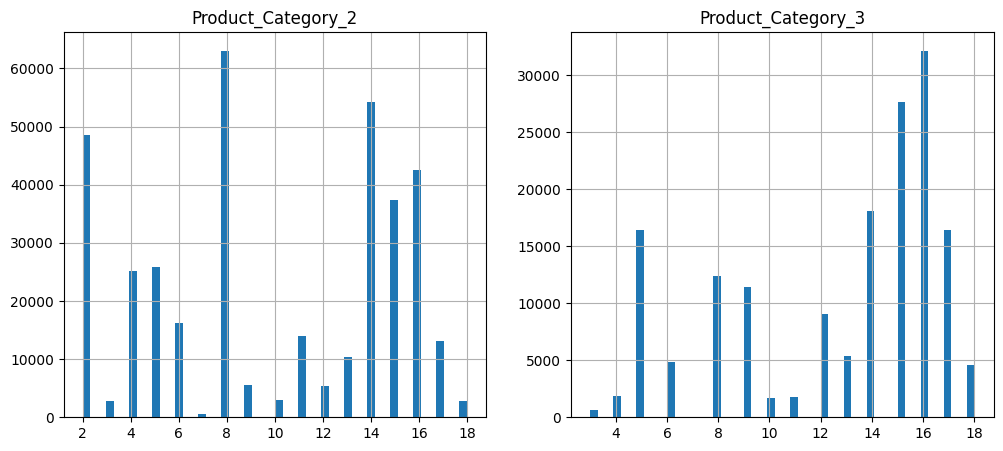

In [6]:
import matplotlib.pyplot as plt

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df['Product_Category_2'].hist(bins=50)
plt.title('Product_Category_2')

plt.subplot(1, 2, 2)
df['Product_Category_3'].hist(bins=50)
plt.title('Product_Category_3')

plt.show()

**When analyzing the distribution of attributes with null values, we observed that the data is skewed. Therefore, it is better to use the median to fill the null values instead of the mean.**

In [7]:
product_category_2_median = df['Product_Category_2'].median()
product_category_3_median = df['Product_Category_3'].median()

print(f"Product_Category_2: Median = {product_category_2_median}")
print(f"Product_Category_3: Median = {product_category_3_median}")

# Fill null values with median
df['Product_Category_2'].fillna(product_category_2_median, inplace=True)
df['Product_Category_3'].fillna(product_category_3_median, inplace=True)

# Verify if null values are filled
print(df.isnull().sum())

Product_Category_2: Median = 9.0
Product_Category_3: Median = 14.0


C:\Users\pc\AppData\Local\Temp\ipykernel_14248\74688374.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product_Category_2'].fillna(product_category_2_median, inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_14248\74688374.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64


2. Outliers

2.1. Detecting Outliers

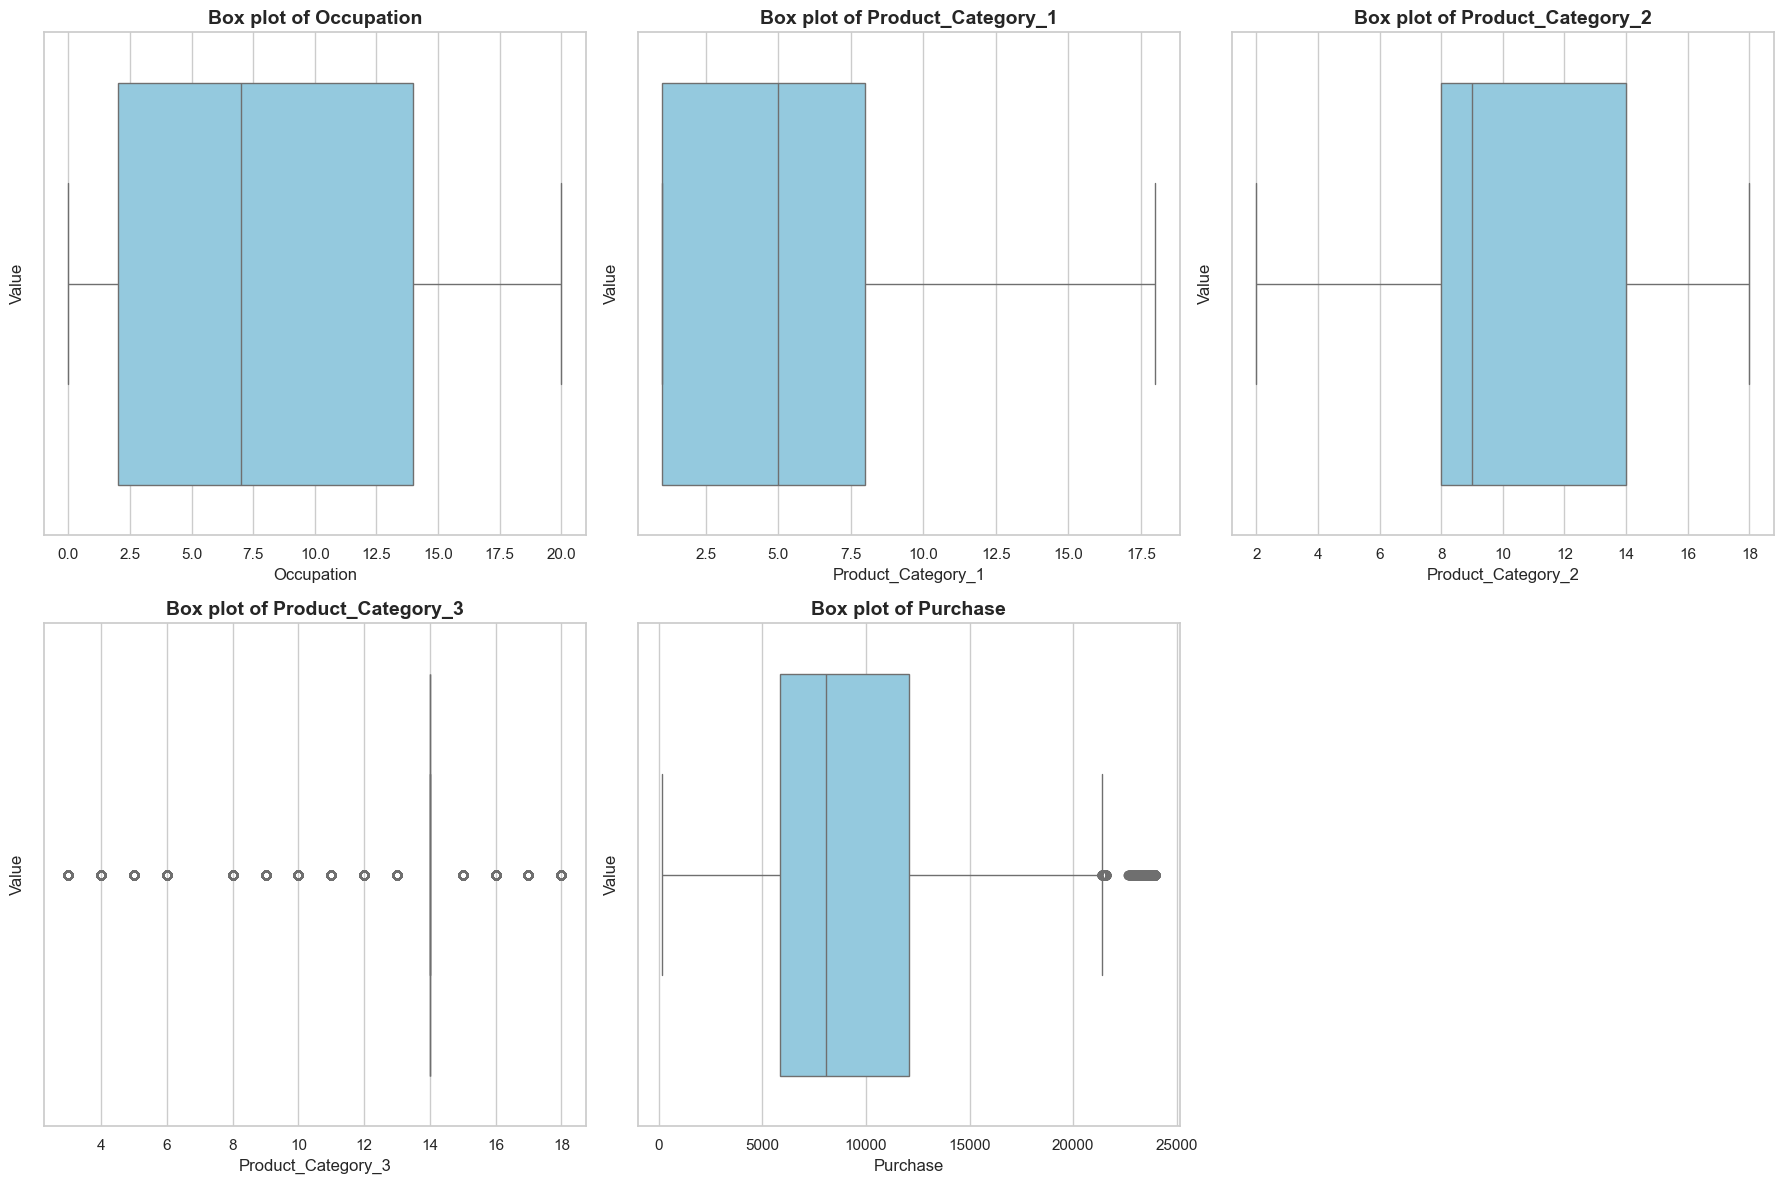

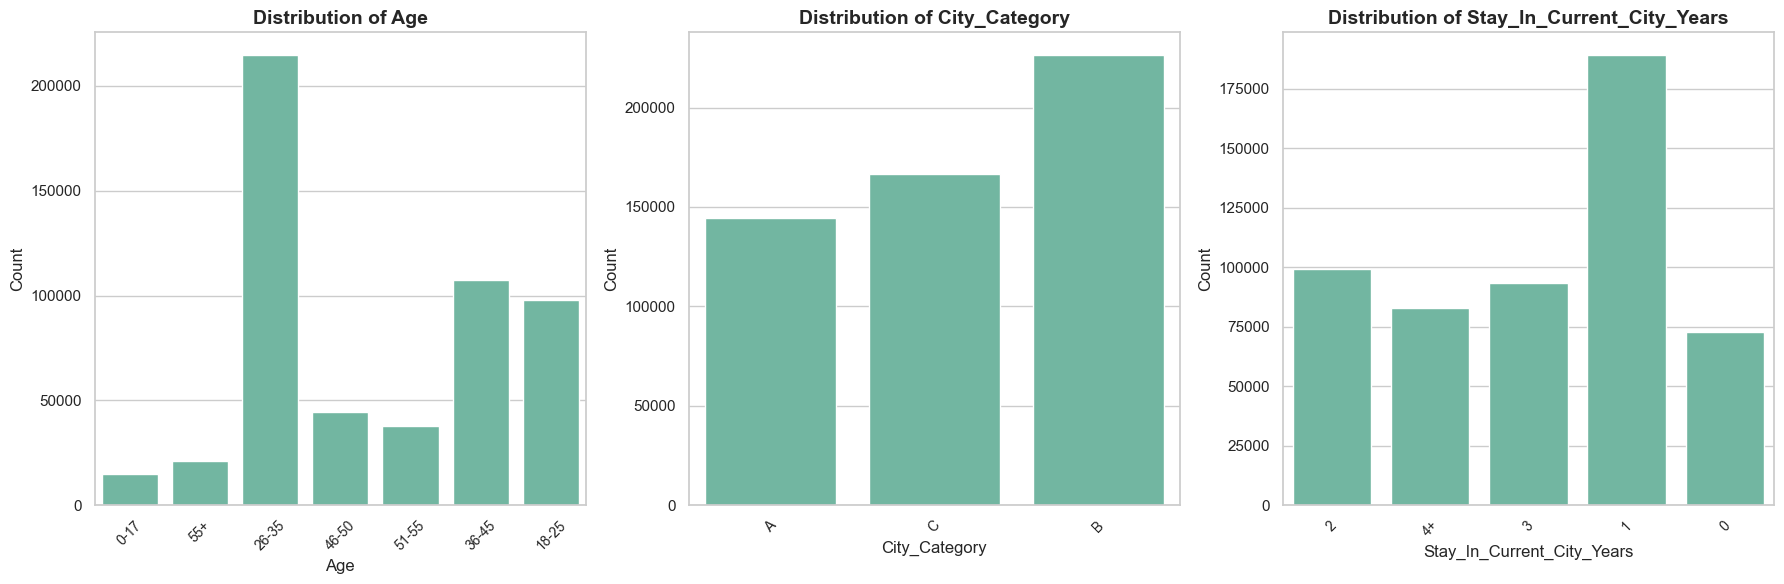

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Define numerical columns
numerical_columns = ['Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']

# Plot box plots for numerical attributes
plt.figure(figsize=(18, 12))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[column], color="skyblue")  # Assign a single color for all box plots
    plt.title(f'Box plot of {column}', fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Value', fontsize=12)
plt.tight_layout()
plt.show()

# Set the color palette for categorical plots
sns.set_palette("Set2")

# Plot histograms for categorical attributes
categorical_columns = ['Age', 'City_Category', 'Stay_In_Current_City_Years']

plt.figure(figsize=(18, 6))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=df[column])
    plt.title(f'Distribution of {column}', fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


**So here, we can conclude that the Purchase and Product_Category_3 having outliers as the data points lie outside the whiskers in the box plot.**

2.1.2 Handle Outliers

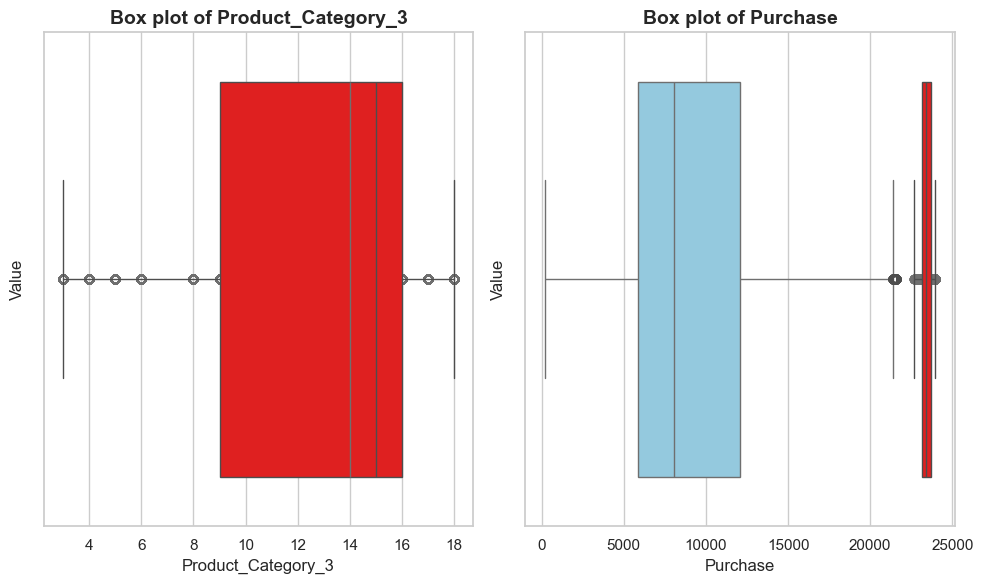

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the data

# Set the style for the plots
sns.set(style="whitegrid")

# Calculate the IQR for Product_Category_3 and Purchase
Q1 = df[['Product_Category_3', 'Purchase']].quantile(0.25)
Q3 = df[['Product_Category_3', 'Purchase']].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_product_category_3 = (df['Product_Category_3'] < lower_bound['Product_Category_3']) | (df['Product_Category_3'] > upper_bound['Product_Category_3'])
outliers_purchase = (df['Purchase'] < lower_bound['Purchase']) | (df['Purchase'] > upper_bound['Purchase'])

# Plot box plots for numerical attributes with outliers highlighted in red
plt.figure(figsize=(10, 6))

# Box plot for Product_Category_3
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Product_Category_3'], color="skyblue")
sns.boxplot(x=df.loc[outliers_product_category_3, 'Product_Category_3'], color="red")  # Outliers highlighted in red
plt.title('Box plot of Product_Category_3', fontsize=14, fontweight='bold')
plt.xlabel('Product_Category_3', fontsize=12)
plt.ylabel('Value', fontsize=12)

# Box plot for Purchase
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Purchase'], color="skyblue")
sns.boxplot(x=df.loc[outliers_purchase, 'Purchase'], color="red")  # Outliers highlighted in red
plt.title('Box plot of Purchase', fontsize=14, fontweight='bold')
plt.xlabel('Purchase', fontsize=12)
plt.ylabel('Value', fontsize=12)

plt.tight_layout()
plt.show()


So finally this outliers are handled and there are no data points outside the whiskers it conveys that there are no outliers

3. Inconsistency

In [15]:
import pandas as pd

# Check for negative values in 'Purchase' column
negative_purchase = df[df['Purchase'] < 0]

# If there are any negative values, print the rows where 'Purchase' is negative
if not negative_purchase.empty:
    print("Inconsistency found: Negative purchase values exist!")
    print(negative_purchase)
else:
    print("No inconsistency found: All purchase values are non-negative.")


No inconsistency found: All purchase values are non-negative.


4. Duplicates

In [16]:
import pandas as pd

# Check for duplicates in the entire DataFrame
duplicates = df[df.duplicated()]

# If there are any duplicates, print them
if not duplicates.empty:
    print("Duplicates found in the dataset:")
    print(duplicates)
else:
    print("No duplicates found in the dataset.")


No duplicates found in the dataset.


Data cleaning process has been successfully completed, encompassing the handling of missing values, outliers, inconsistent data, and removal of duplicated entries, ensuring the dataset's integrity and readiness for further analysis.

Data Analysis

1. Gender

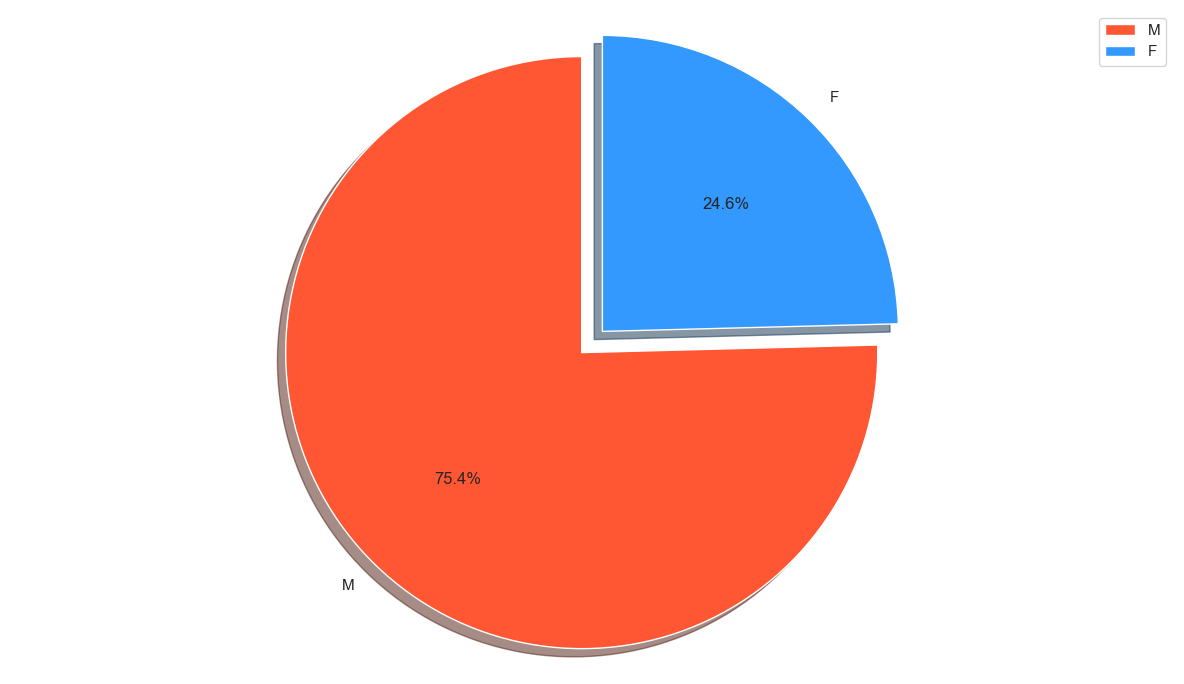

In [22]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data

# Count the number of occurrences for each gender
gender_counts = df['Gender'].value_counts()

# Define labels and colors
labels = gender_counts.index
sizes = gender_counts.values
colors = ['#FF5733', '#3399FF']  # Brighter color combination (orange and bright blue)

# Explode the female slice
explode = (0.1, 0)

# Plot the pie chart
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()


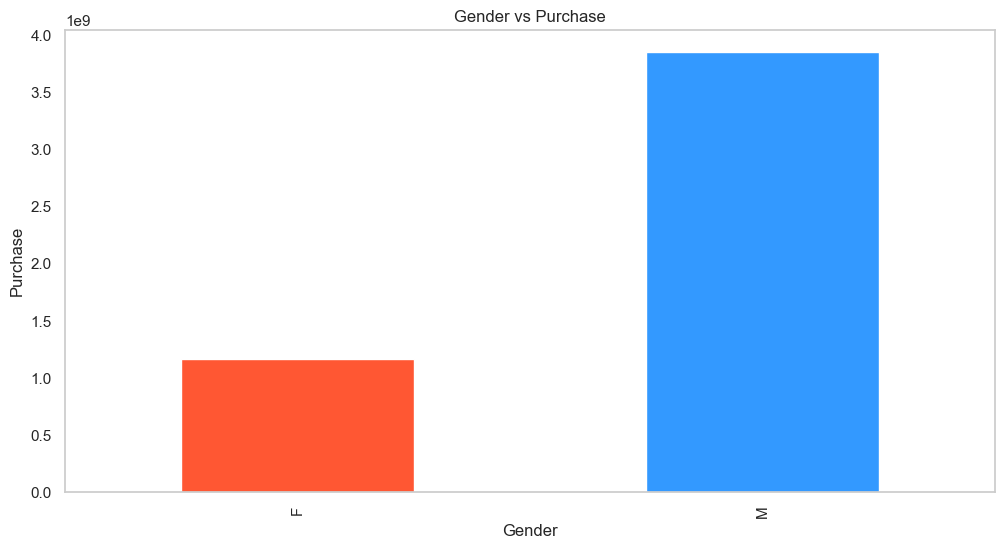

In [25]:
import matplotlib.pyplot as plt

def plot(group, column, plot_type, colors=None):
    fig, ax = plt.subplots(figsize=(12, 6))
    data = df.groupby(group)[column].sum().sort_values()
    if colors:
        data.plot(kind=plot_type, color=colors)
    else:
        data.plot(kind=plot_type)
    plt.title(f'{group} vs {column}')
    plt.xlabel(group)
    plt.ylabel(column)
    ax.grid(False)  # Turn off grid lines
    plt.show()

# Call the plot function with specified colors
plot('Gender', 'Purchase', 'bar', colors=['#FF5733', '#3399FF'])


Our sales data shows that men make up 75% of our customers and prefer products priced between 8000 - 12,000, driving over 4 billion in sales. Women, while fewer in number, still contribute over 1 billion in sales.

2. Age

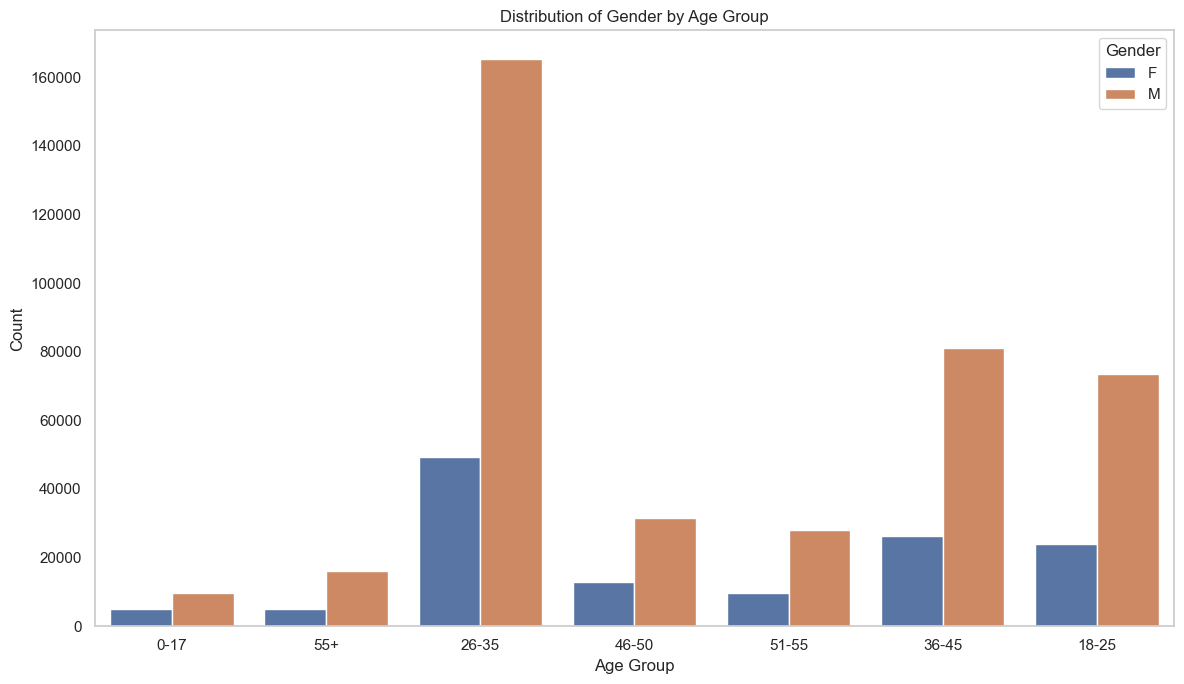

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data

# Set the size of the plot
fig1, ax1 = plt.subplots(figsize=(12, 7))

# Create the countplot
sns.countplot(x='Age', hue='Gender', data=df, ax=ax1)

# Add labels and title
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Gender by Age Group')
ax1.grid(False)
# Show plot
plt.tight_layout()
plt.show()


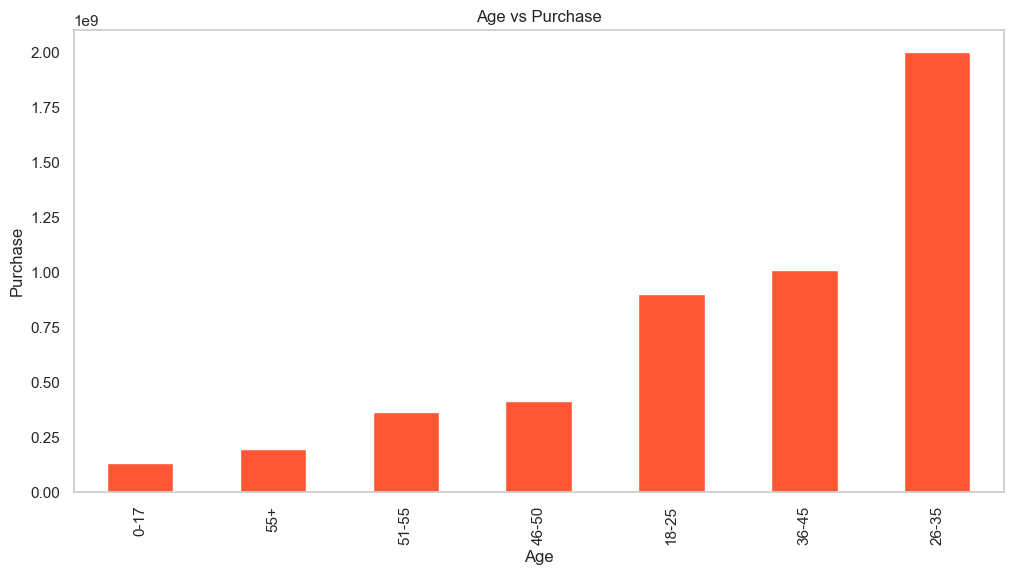

In [37]:
plot('Age', 'Purchase', 'bar', colors=['#FF5733'])

**Obviously, we can consider that the target age group of our stores is the age group of 26-35 years, Since we had achieved sales of more than 3 billion in the age group of 26-35 years.**

3. City

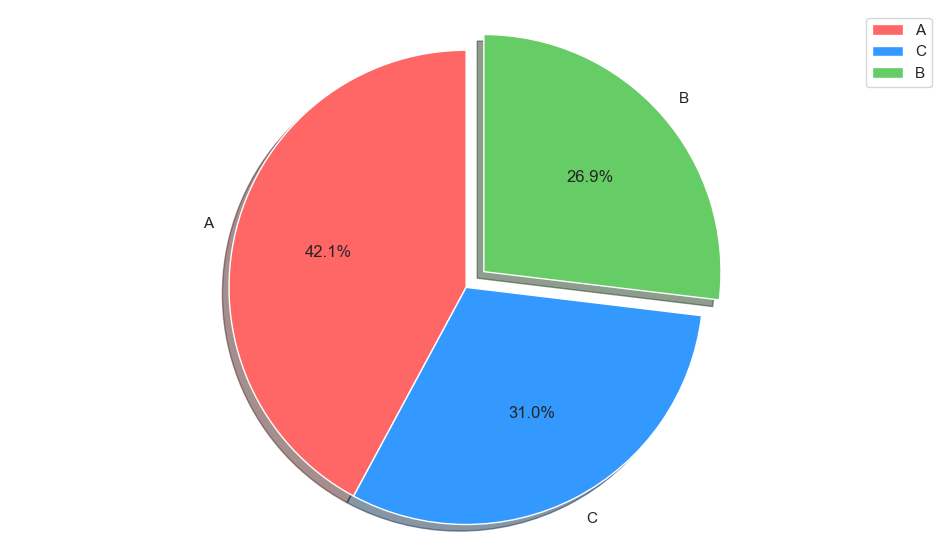

In [42]:
import matplotlib.pyplot as plt
explode = (0, 0, 0.1)
colors = ['#FF6666', '#3399FF', '#66CC66']
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(df['City_Category'].value_counts(), explode=explode, labels=df['City_Category'].unique(), autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal') 
plt.legend()
plt.show()


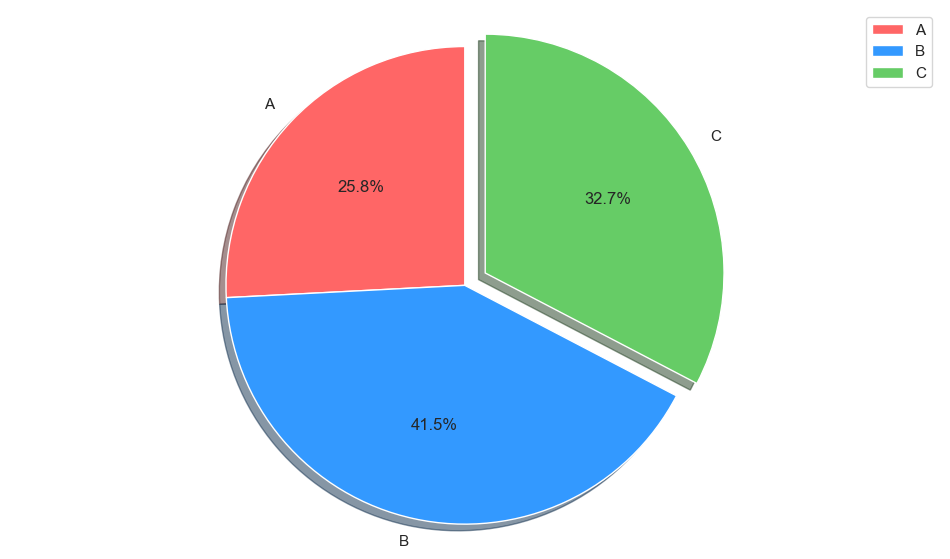

In [43]:
import matplotlib.pyplot as plt
total_purchase_by_city = df.groupby('City_Category')['Purchase'].sum()
explode = (0, 0, 0.1)
colors = ['#FF6666', '#3399FF', '#66CC66']
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(total_purchase_by_city, explode=explode, labels=total_purchase_by_city.index, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal') 
plt.legend()
plt.show()


"City B demonstrates a notably higher purchasing activity compared to other cities. To enhance sales, prioritizing marketing efforts towards City B while maintaining a presence across all cities can capitalize on this trend, leading to increased revenue."

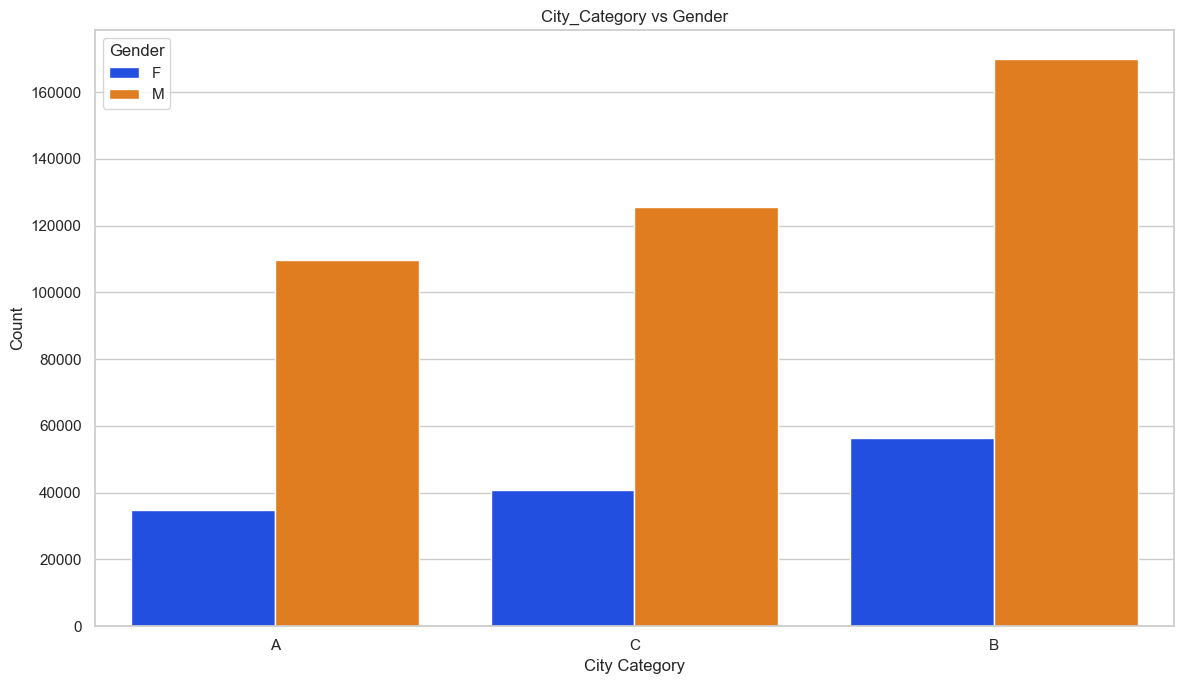

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig2, ax2 = plt.subplots(figsize=(12, 7))

# Plot the count plot
sns.countplot(x='City_Category', hue='Gender', data=df, ax=ax2)
plt.title('City_Category vs Gender')
plt.xlabel('City Category')
plt.ylabel('Count')

# Show plot
plt.tight_layout()
plt.show()


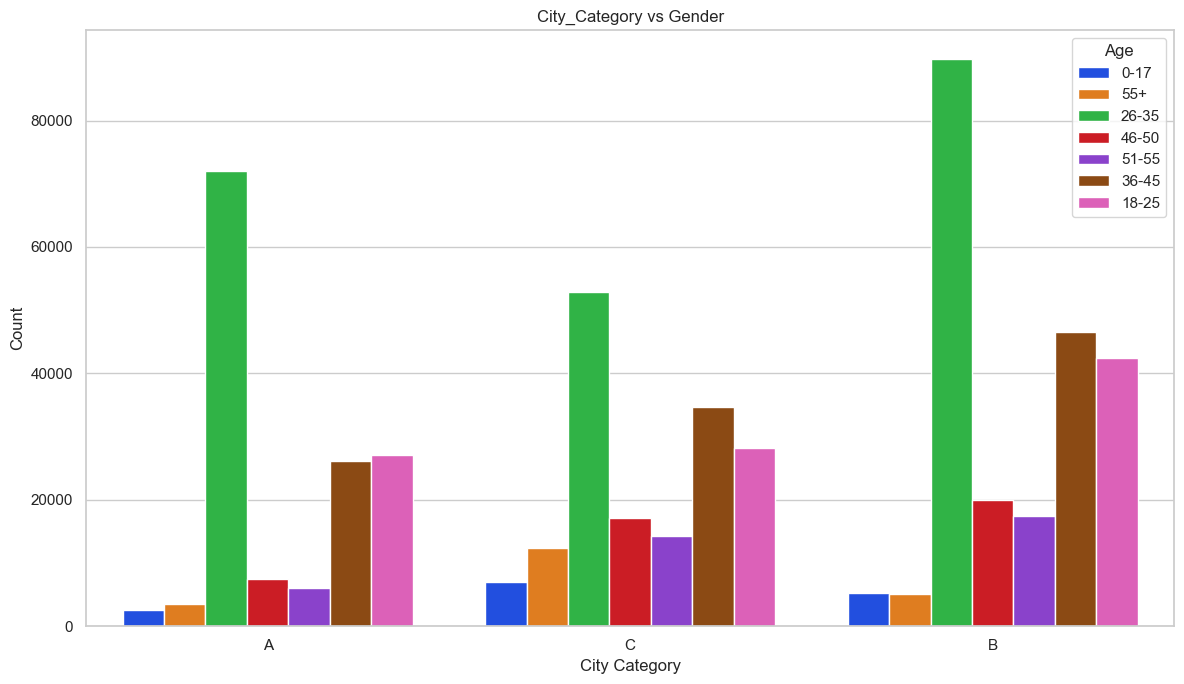

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig2, ax2 = plt.subplots(figsize=(12, 7))

# Plot the count plot
sns.countplot(x='City_Category', hue='Age', data=df, ax=ax2)
plt.title('City_Category vs Gender')
plt.xlabel('City Category')
plt.ylabel('Count')

# Show plot
plt.tight_layout()
plt.show()


Unexpectedly, the highest sales do not come in the number of purchases, people from City B have a greater purchasing power than others, and greater sales gained from people belong to City C.

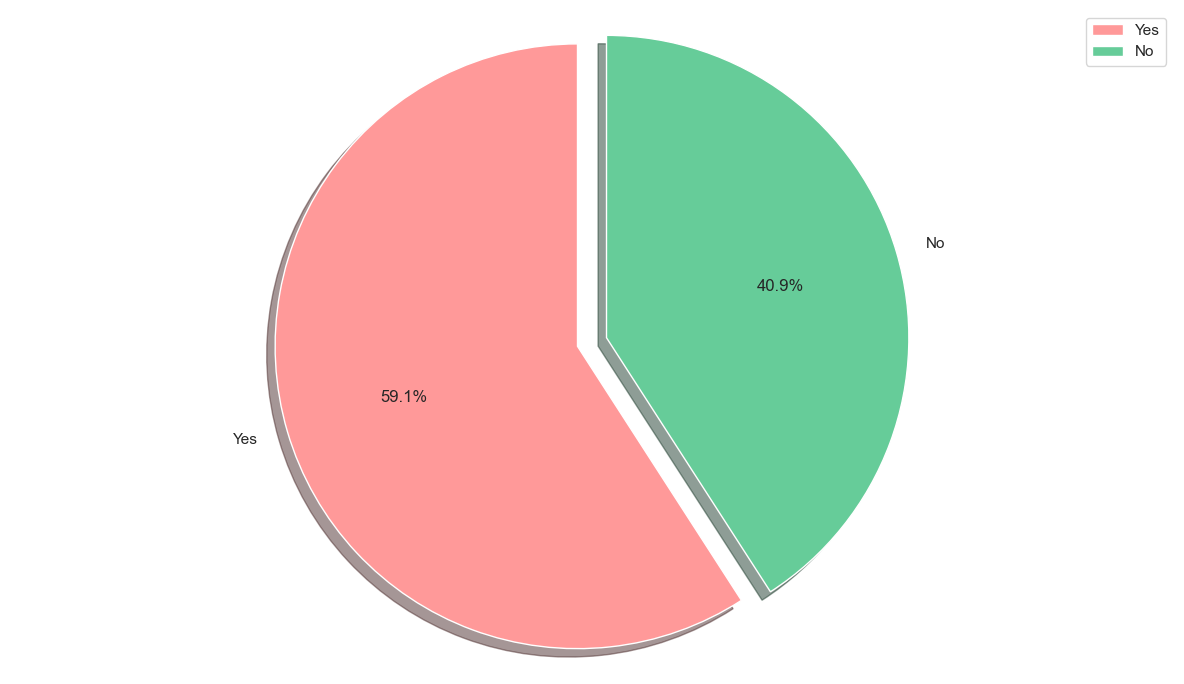

In [48]:
import matplotlib.pyplot as plt
explode = (0.1, 0)
colors = ['#FF9999', '#66CC99']
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(df['Marital_Status'].value_counts(), explode=explode, labels=['Yes', 'No'], autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')  
plt.legend()
plt.tight_layout()
plt.show()


Our analysis reveals that individuals aged 26-35 from City B and married individuals exhibit higher purchase behavior. Targeting marketing efforts towards this demographic could boost sales and enhance overall revenue.

**Most of our customers are more than 60% married, I see that the strategy of targeting families to ensure more clients succeed.**

4. Stability

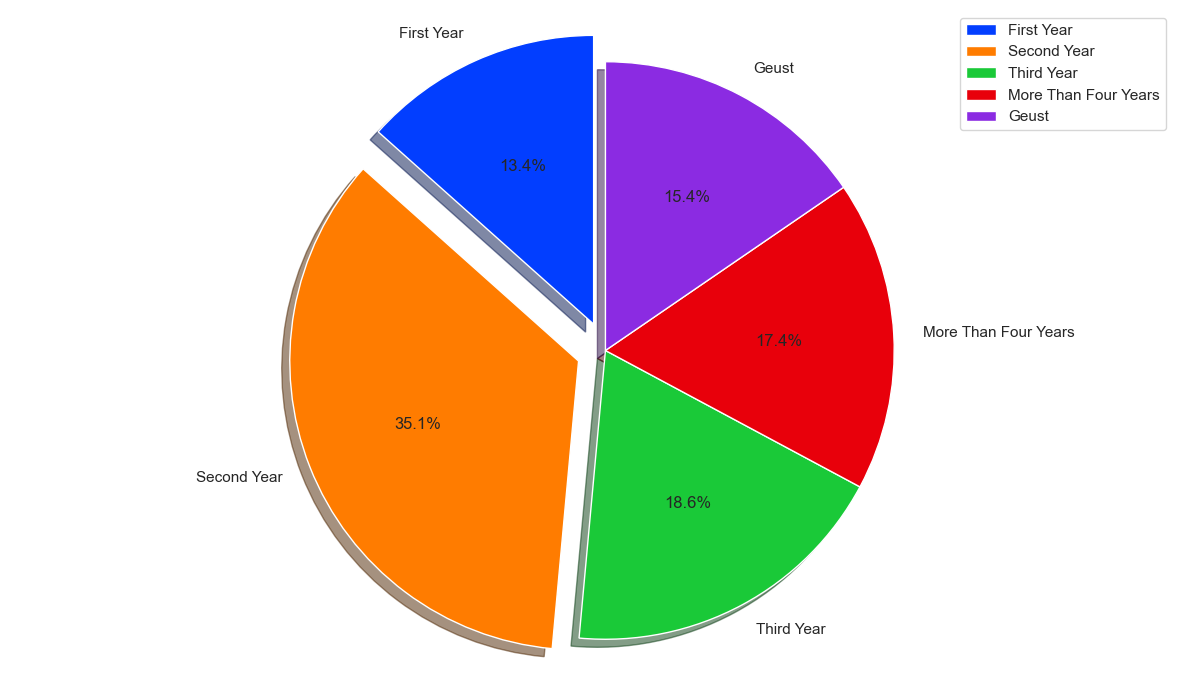

In [49]:
labels=['First Year','Second Year','Third Year','More Than Four Years','Geust']
explode = (0.1, 0.1,0,0,0)
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df.groupby('Stay_In_Current_City_Years')['Purchase'].sum(),explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

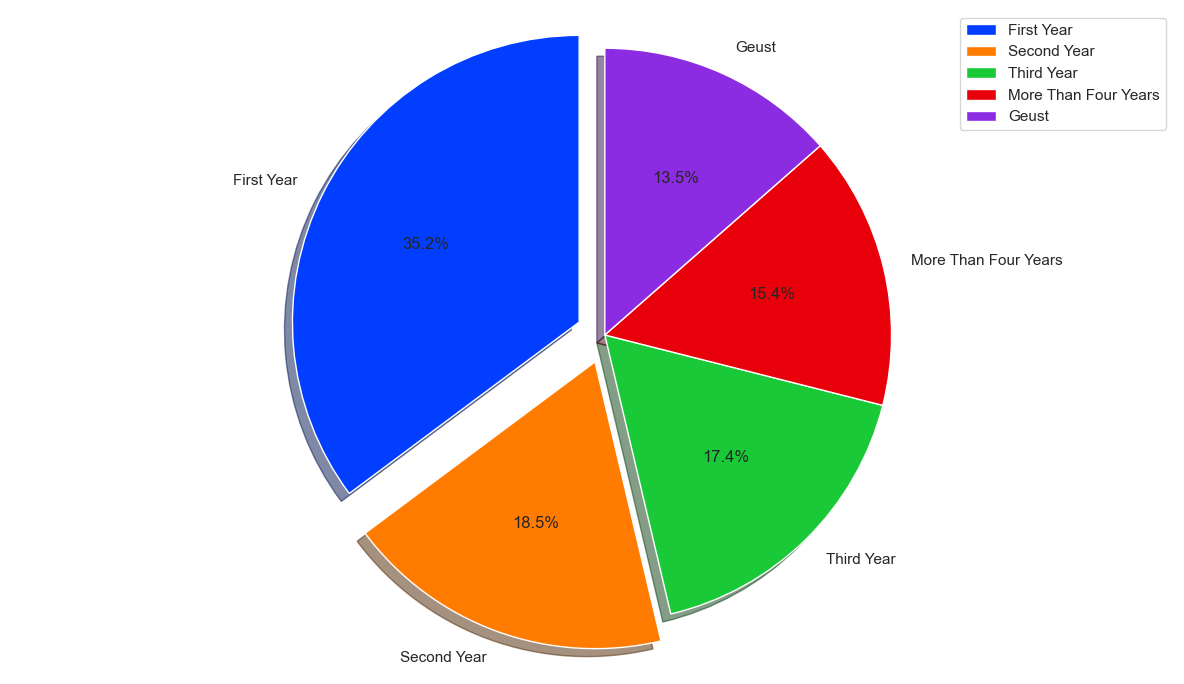

In [50]:
labels=['First Year','Second Year','Third Year','More Than Four Years','Geust']
#label=['Underage 0-17','Retired +55','Middleage 26-35','46-50 y/o','Oldman 51-55','Middleage+ 36-45','Youth']
explode = (0.1, 0.1,0,0,0)
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df['Stay_In_Current_City_Years'].value_counts(),explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

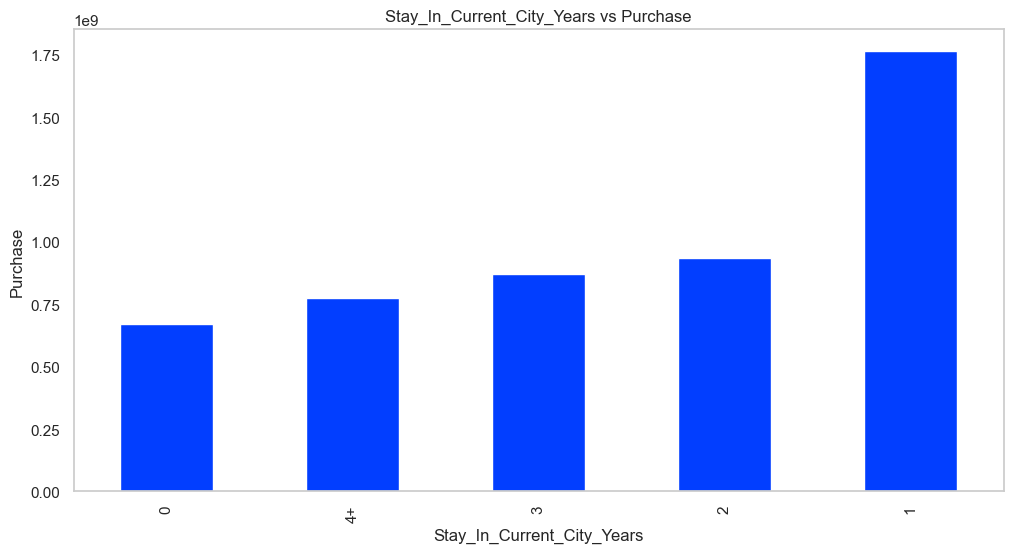

In [51]:
plot('Stay_In_Current_City_Years','Purchase','bar')

We have worked hard in the past two years and have achieved a large percentage of sales from the new population of cities, but these figures indicate that the older city dwellers have less passion for our products. 

5. Occupation

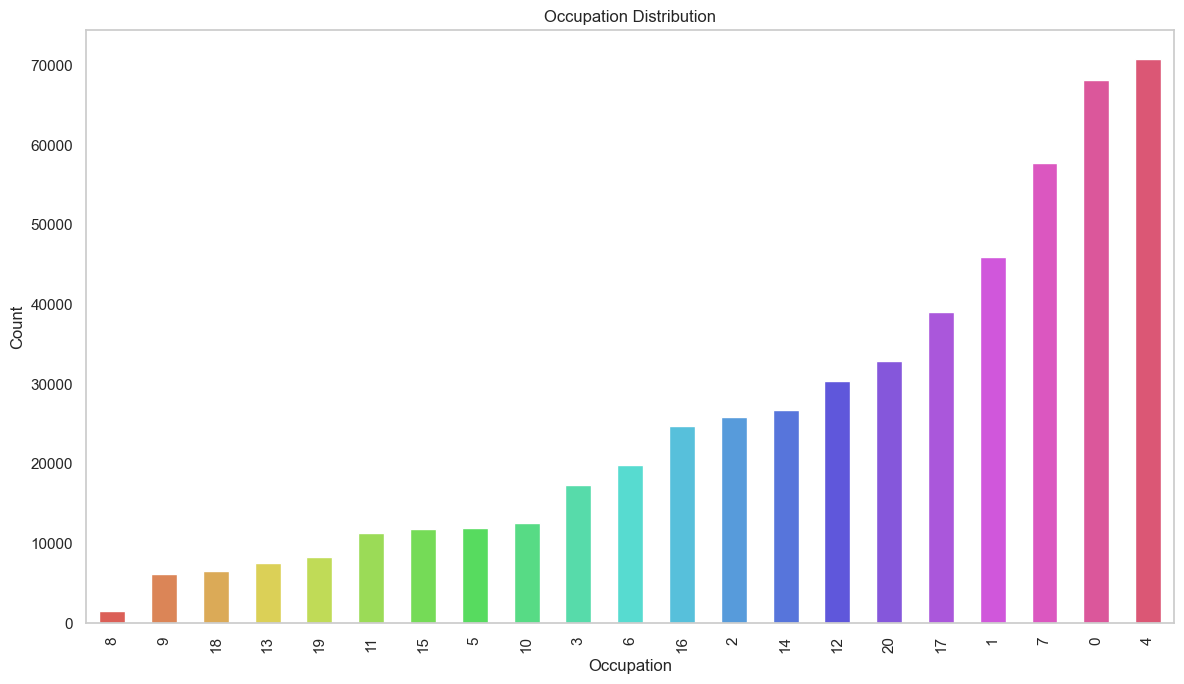

In [57]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots(figsize=(12, 7))
palette = sns.color_palette("hls", len(df['Occupation'].unique()))
df['Occupation'].value_counts().sort_values().plot(kind='bar', ax=ax1,color=palette)
ax1.set_title('Occupation Distribution')
ax1.set_xlabel('Occupation')
ax1.set_ylabel('Count')
ax1.grid(False)
# Show plot
plt.tight_layout()
plt.show()


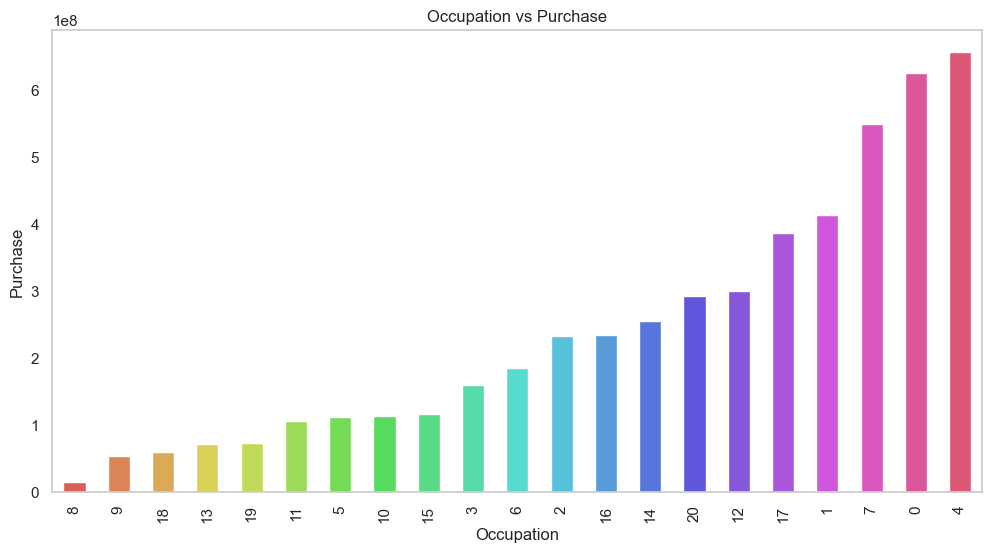

In [58]:
palette = sns.color_palette("hls", len(df['Occupation'].unique()))
plot('Occupation', 'Purchase', 'bar', colors=palette)

We also note that purchasing power in some cases closely related to purchasring power.

6. Product Categories

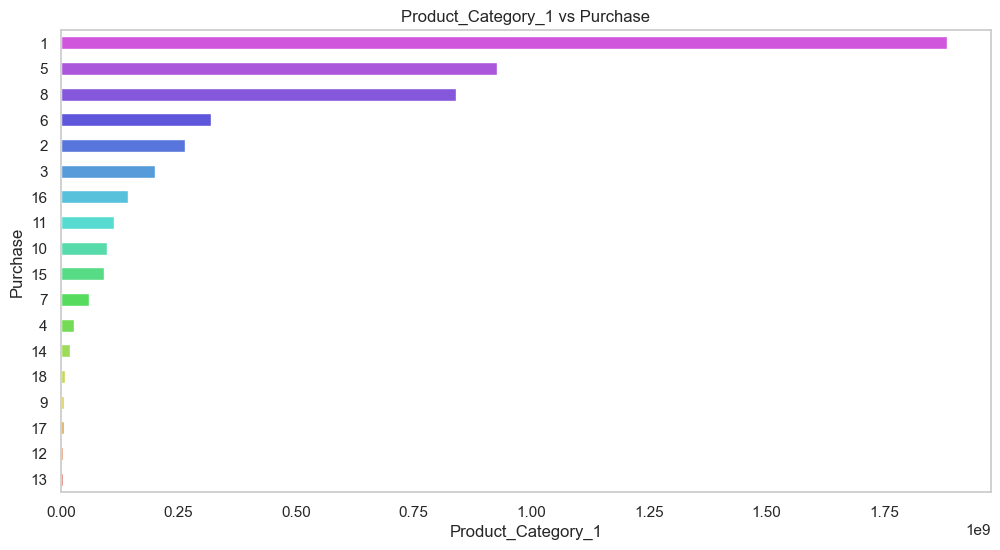

In [59]:
palette = sns.color_palette("hls", len(df['Occupation'].unique()))
plot('Product_Category_1','Purchase','barh',colors=palette)

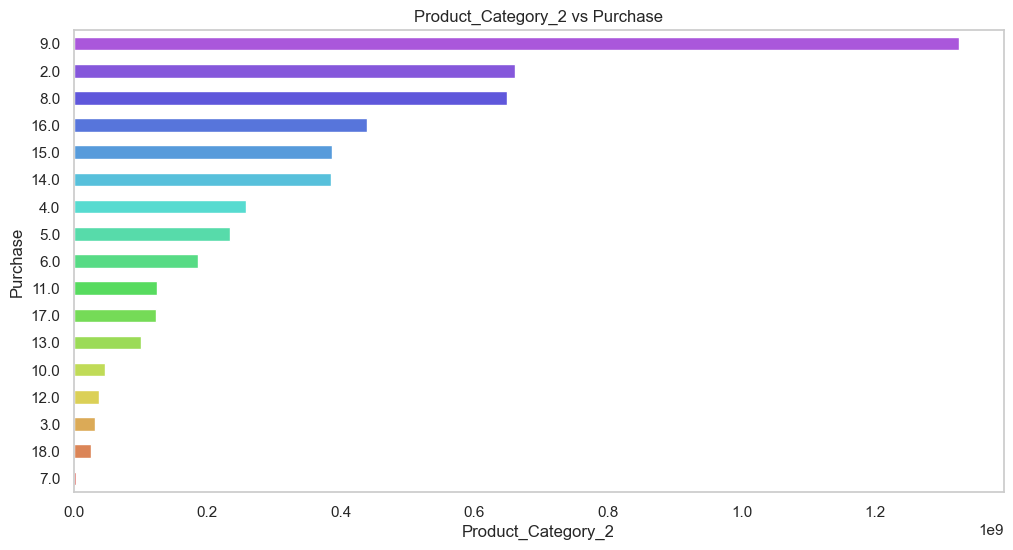

In [60]:
palette = sns.color_palette("hls", len(df['Occupation'].unique()))
plot('Product_Category_2','Purchase','barh',colors=palette)

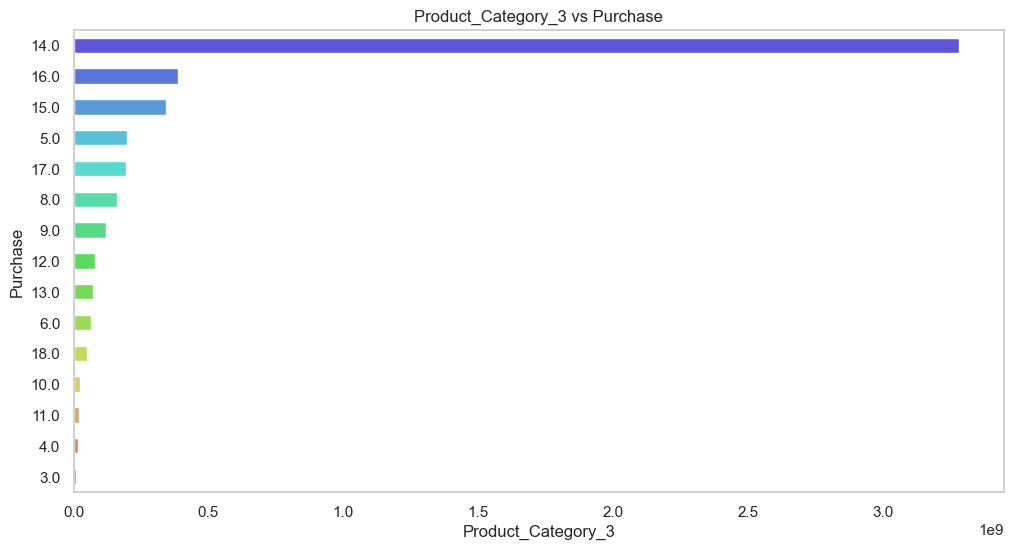

In [61]:
palette = sns.color_palette("hls", len(df['Occupation'].unique()))
plot('Product_Category_3','Purchase','barh',colors=palette)

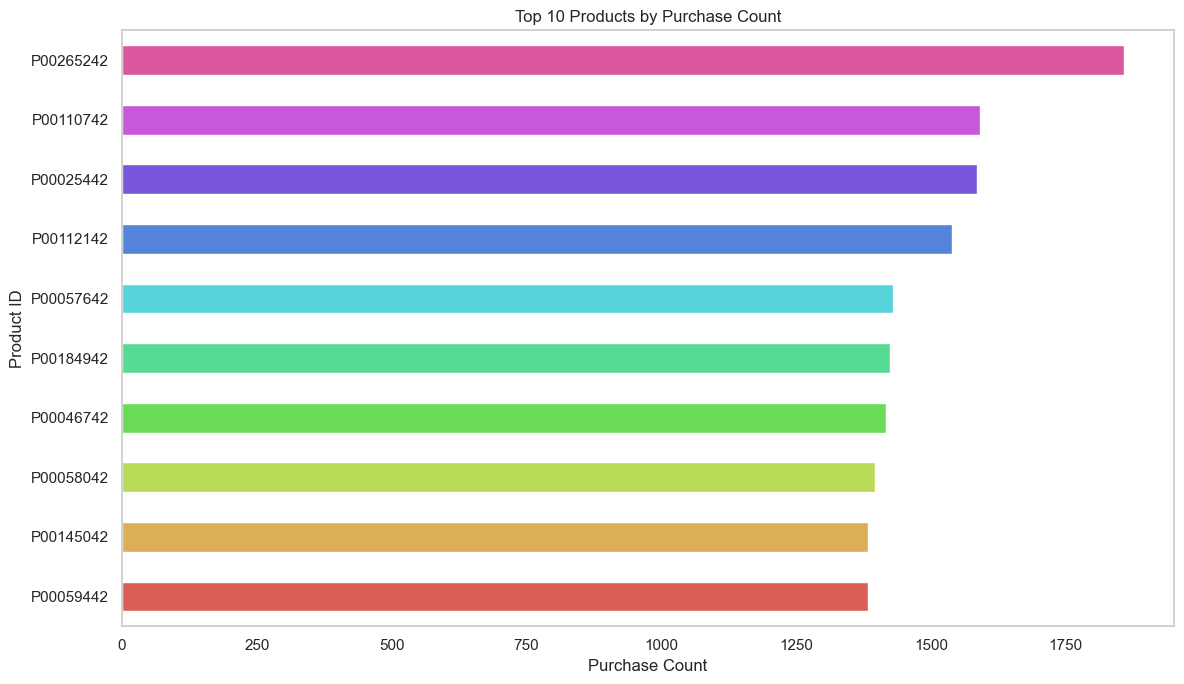

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
top_products = df.groupby('Product_ID')['Purchase'].count().nlargest(10).sort_values()
palette = sns.color_palette("hls", len(top_products))
fig1, ax1 = plt.subplots(figsize=(12, 7))
top_products.plot(kind='barh', ax=ax1, color=palette)
ax1.set_title('Top 10 Products by Purchase Count')
ax1.set_xlabel('Purchase Count')
ax1.set_ylabel('Product ID')
ax1.grid(False)
plt.tight_layout()
plt.show()


The analysis of purchase data highlights the top 10 products by purchase count. 

"After analyzing the data, we recommend targeting families, men, and individuals aged 26-35 i.e youth, as they represent key demographics with significant purchasing power. Furthermore, prioritizing the top 10 product categories, which demonstrate high profitability, can enhance sales and overall business success."